In [1]:
from phi.torch.flow import *
import matplotlib.pyplot as plt

In [2]:
def compute_nonlinear(u : math.Tensor,
                      k : math.Tensor):
    u = math.ifft(u)
    return -.5j * k * math.fft(u ** 2)

In [3]:
# etrk2 step 
def sim_step(u: math.Tensor,
            dt: float,
            k: math.Tensor):
    L = k ** 2 - k ** 4
    u = math.fft(u)
    nonlinear_u = compute_nonlinear(u, k)
    # a = u * math.exp(L * dt) + nonlinear_term * (math.exp(L * dt) - 1) / L
    exp_factor = math.exp(L * dt)
    a = math.where(L == 0, 
                   u + nonlinear_u * dt, 
                   u * exp_factor + nonlinear_u * (exp_factor - 1) / L)
    nonlinear_a = compute_nonlinear(a, k)
    u_next = math.where(L == 0, 
                        a + (nonlinear_a - nonlinear_u) * 0.5 * dt, 
                        a + (nonlinear_a - nonlinear_u) * (exp_factor - 1 - L*dt) /  (L ** 2 * dt))
    return math.real(math.ifft(u_next))

In [4]:
def solver(u0: math.tensor, 
           dt: float,
           num_steps: int):
    Nx = len(u0)
    k = 2 * PI * math.fftfreq(spatial(points = Nx), dx = 1)[0]

    states = math.expand(u0, spatial('time'))
    for _ in range(num_steps):
        state = sim_step(u = states.time[-1], dt = dt, k = k )
        states = math.concat([states, math.expand(state, spatial('time'))], dim='time')
    return states

In [5]:
sampled_signs = math.sign(math.random_uniform(batch(sign = 6), low = -1 ,high = 1 ))
sampled_alphas = math.random_uniform(batch(alpha = 6), low = -8, high = 8)

In [6]:
X = 10 # domain size 
Nx = 50
dt = .5
x = math.linspace(start=0, stop=X, dim = spatial(points = Nx))
u0 = math.cos(2 * x) + sampled_signs.sign[0] *  0.1 * math.cos(2 * PI * x / X) * (1 - sampled_alphas.alpha[0] * math.sin(2 * PI * x / X))
dx = X / Nx
num_steps = 8000


In [7]:
sol_1 = solver(u0, dt, num_steps)

<Figure size 1200x500 with 2 Axes>

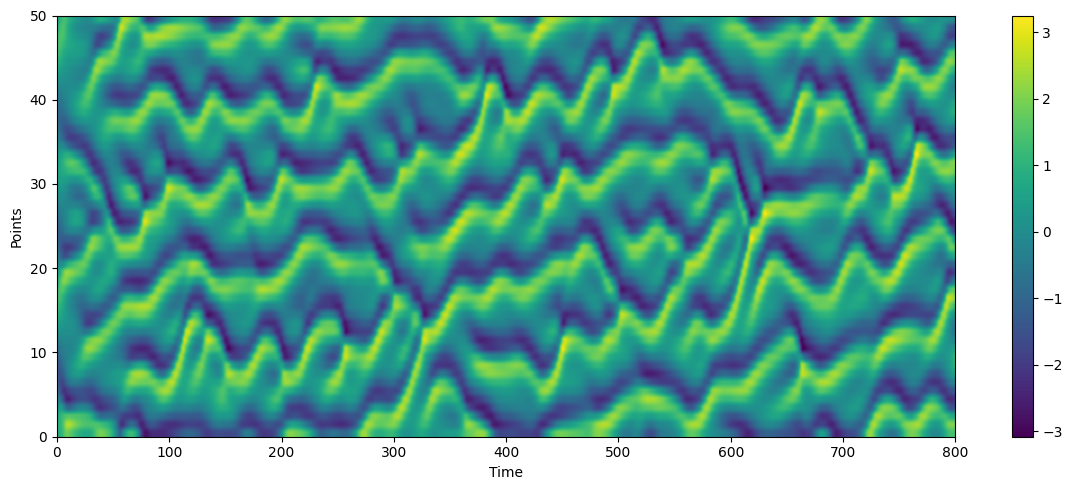

In [8]:
vis.plot(CenteredGrid(sol_1.time[:800]))

In [9]:
u0 = math.cos(2 * x) + sampled_signs.sign[1] *  0.1 * math.cos(2 * PI * x / X) * (1 - sampled_alphas.alpha[1] * math.sin(2 * PI * x / X))
sol_2 = solver(u0, dt, num_steps)

<Figure size 1200x500 with 2 Axes>

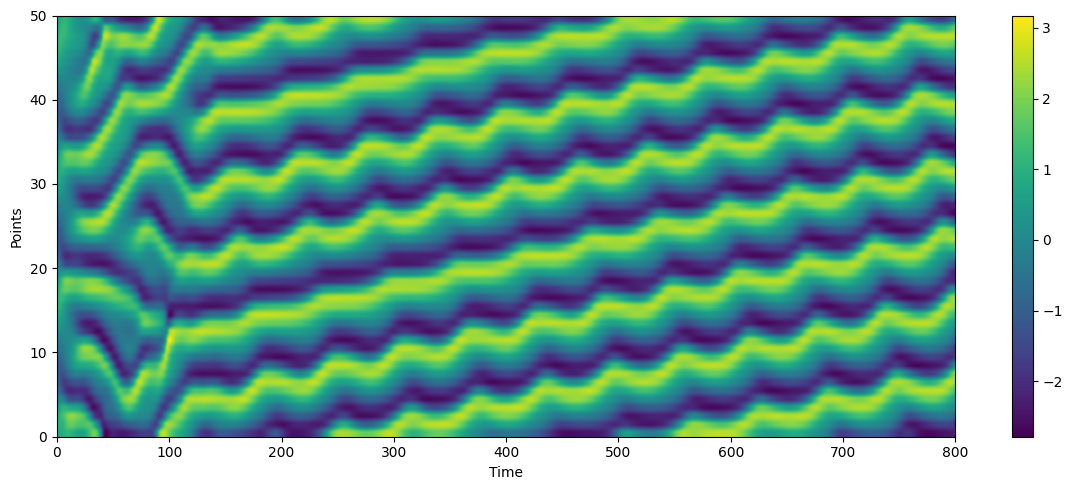

In [10]:
vis.plot(CenteredGrid(sol_2.time[:800]))

In [11]:
u0 = math.cos(2 * x) + sampled_signs.sign[2] *  0.1 * math.cos(2 * PI * x / X) * (1 - sampled_alphas.alpha[2] * math.sin(2 * PI * x / X))
sol_3 = solver(u0, dt, num_steps)

<Figure size 1200x500 with 2 Axes>

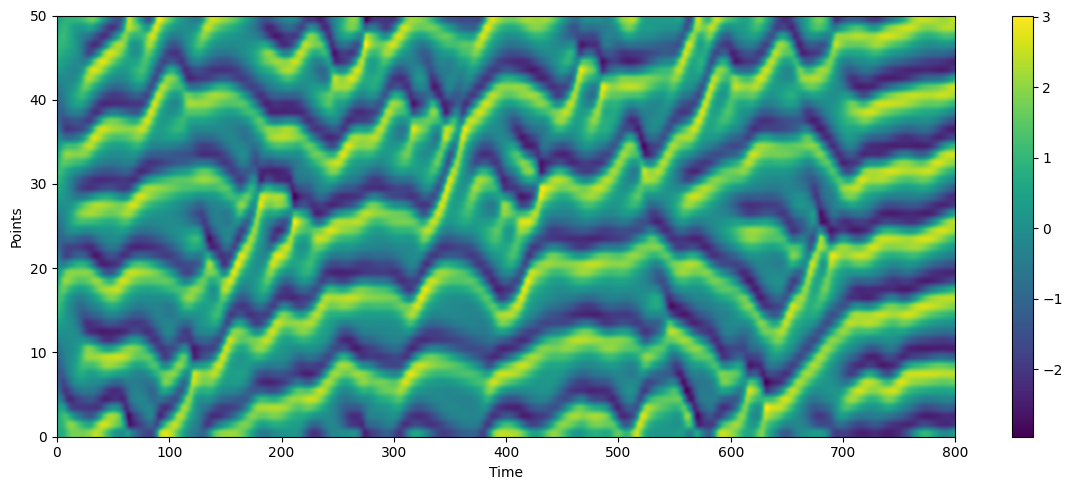

In [12]:
vis.plot(CenteredGrid(sol_3.time[:800]))

In [13]:
u0 = math.cos(2 * x) + sampled_signs.sign[3] *  0.1 * math.cos(2 * PI * x / X) * (1 - sampled_alphas.alpha[3] * math.sin(2 * PI * x / X))
sol_4 = solver(u0, dt, num_steps)

<Figure size 1200x500 with 2 Axes>

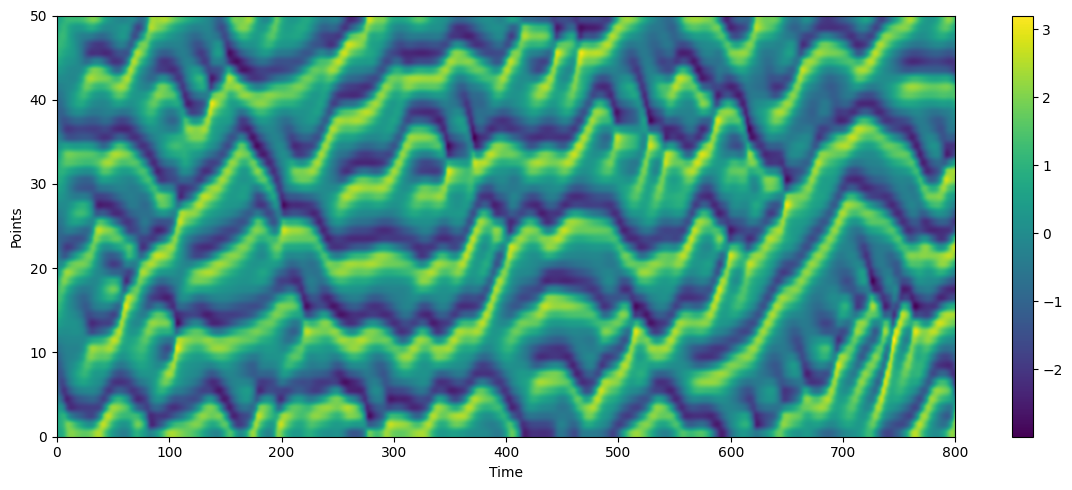

In [14]:
vis.plot(CenteredGrid(sol_4.time[:800]))

In [15]:
u0 = math.cos(2 * x) + sampled_signs.sign[4] *  0.1 * math.cos(2 * PI * x / X) * (1 - sampled_alphas.alpha[4] * math.sin(2 * PI * x / X))
sol_5 = solver(u0, dt, num_steps)

<Figure size 1200x500 with 2 Axes>

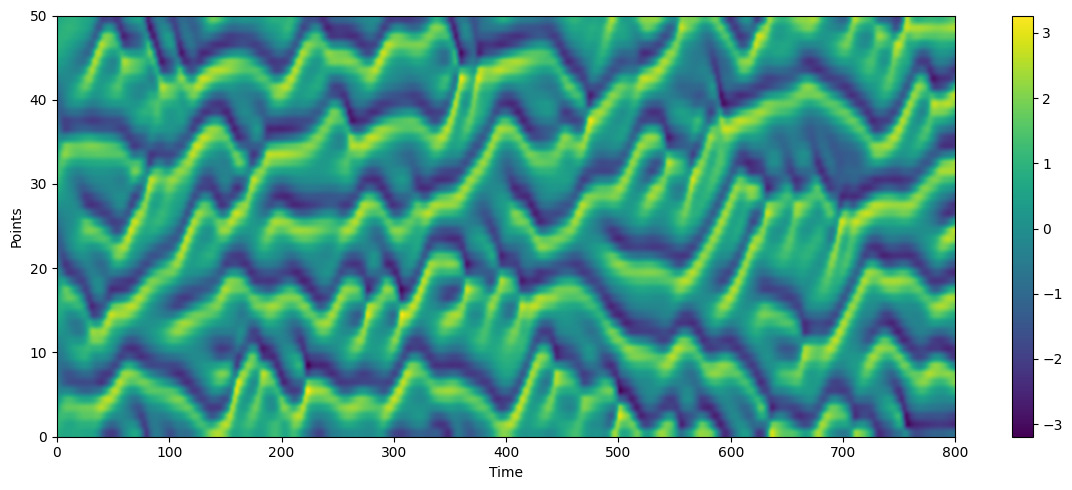

In [16]:
vis.plot(CenteredGrid(sol_5.time[:800]))

In [17]:
u0 = math.cos(2 * x) + sampled_signs.sign[5] *  0.1 * math.cos(2 * PI * x / X) * (1 - sampled_alphas.alpha[5] * math.sin(2 * PI * x / X))
sol_6 = solver(u0, dt, num_steps)

<Figure size 1200x500 with 2 Axes>

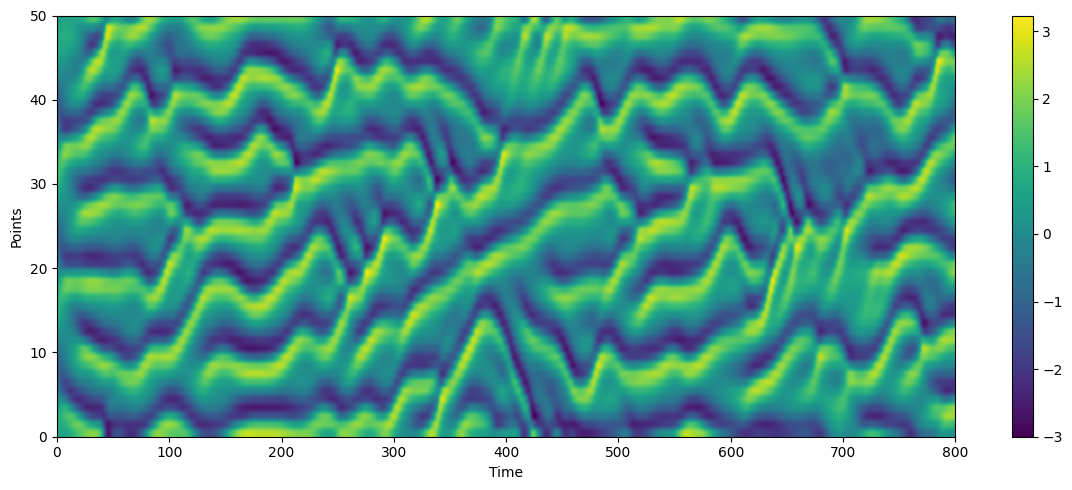

In [18]:
vis.plot(CenteredGrid(sol_6.time[:800]))